# Evaluation Notebook

# FloodNet: Segmentation of images during a flooding event


**Authors**

*Group 3*
*  Chang Chun  (322252)
*  Maria  
*  Tian Tian  

## Setup

In [ ]:
!pip install numpy torch gdown pandas matplotlib seaborn opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Download Data

full data: 
https://drive.google.com/drive/folders/1fpRKcNX6eb_44mIhZbNuihE-JecpOzPV?usp=sharing

only test data and checkpoint:
https://drive.google.com/drive/folders/14e1_OV9KcMLflWiv0PHsUNF8t3gtitus?usp=share_link

#### download checkpoint

In [ ]:
# # download data from google drive
# # only include test data and checkpoint

!gdown --id 1-6GPPx62ZhNrQ-WKWqtN59dJoFindm1v  # download checkpoint "ckpt_case4_100.pth"

# run into permission problems, can download it directly 

#### if using Colab, otherwise ignore it

In [ ]:
# # If using colab, can save the file to Google Drive, 
# # then right click the file, "Add a shortcut to Drive"

# # For the Plots and Results part, if put the checkpoint in other path, can ignore this cell

# from google.colab import drive
# drive.mount('/content/drive')

# import os
# os.chdir("/content/drive/MyDrive/IPEO_project_data")

# os.getcwd() # check dir

Mounted at /content/drive


'/content/drive/.shortcut-targets-by-id/1fpRKcNX6eb_44mIhZbNuihE-JecpOzPV/IPEO_project_data'

## Plots and Results

### load checkpoint

In [ ]:
# load checkpoint
import os
import torch

# download the checkpoint, and change the path to where you put it
PATH = os.getcwd() # check dir
path_checkpoint = PATH + "/ckpt_case4_100.pth"  # the file path may need to be modified
# path_checkpoint = "/content/drive/MyDrive/IPEO_project_data/checkpoint/ckpt_case4_100.pth"  # if use Colab
checkpoint = torch.load(path_checkpoint) 

num_epochs = checkpoint['epoch']
confusion_train = checkpoint['confusion_train']
confusion_val = checkpoint['confusion_val']
losses_train = checkpoint['losses_train']
losses_val = checkpoint['losses_val']
oas_train = checkpoint['oas_train']
oas_val = checkpoint['oas_val']
f1s_train = checkpoint['f1s_train']
f1s_val = checkpoint['f1s_val']
train_time = checkpoint['train_time']
val_time = checkpoint['val_time']

loss_test = 0.73
oa_test = 0.76
f1_test = 0.75

### Losses, OA, F1 score per epoch

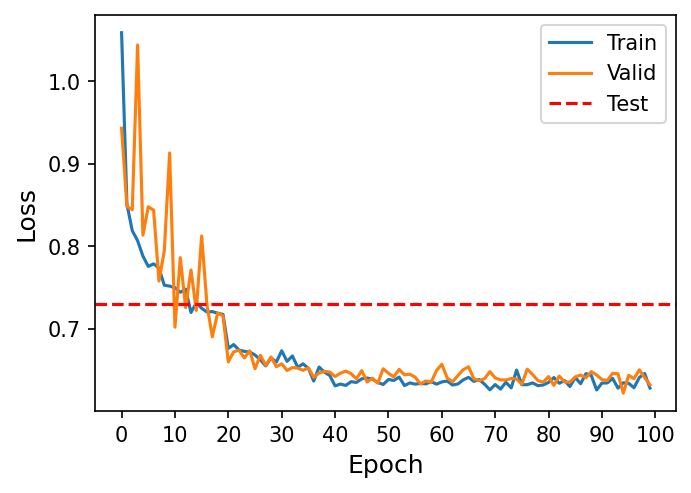

In [ ]:
# Loss

import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

plt.figure(dpi=150,figsize=(5,3.5))
plt.plot(losses_train)
plt.plot(losses_val)
plt.axhline(y=loss_test, ls='--', c='red')

x = MultipleLocator(10)    
ax = plt.gca()
ax.xaxis.set_major_locator(x)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(['Train','Valid','Test'],loc=1)
plt.show()

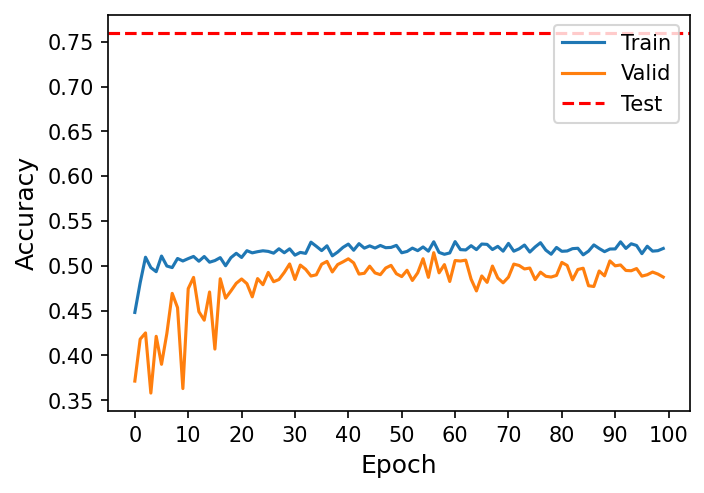

In [ ]:
# OA

import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

plt.figure(dpi=150,figsize=(5,3.5))
plt.plot(oas_train)
plt.plot(oas_val)
plt.axhline(y=oa_test, ls='--', c='red')

x = MultipleLocator(10)    
ax = plt.gca()
ax.xaxis.set_major_locator(x)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(['Train','Valid','Test'],loc=1)
plt.show()

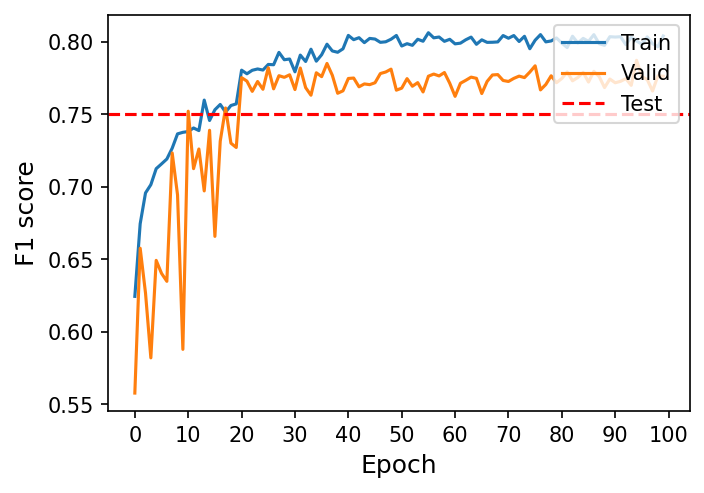

In [ ]:
# F1 score

import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

plt.figure(dpi=150,figsize=(5,3.5))
plt.plot(f1s_train)
plt.plot(f1s_val)
plt.axhline(y=f1_test, ls='--', c='red')

x = MultipleLocator(10)    
ax = plt.gca()
ax.xaxis.set_major_locator(x)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('F1 score', fontsize=12)
plt.legend(['Train','Valid','Test'],loc=1)
plt.show()

### Train & Valid running time



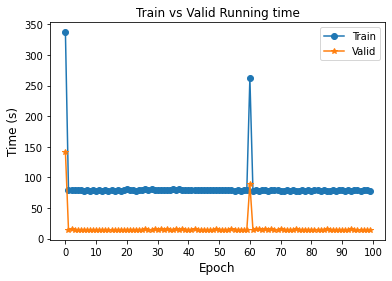

In [ ]:
# running time

import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

plt.plot(train_time,'-o')
plt.plot(val_time,'-*')
x = MultipleLocator(10)    
ax = plt.gca()
ax.xaxis.set_major_locator(x)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Time (s)', fontsize=12)
plt.legend(['Train','Valid'],loc=1)
plt.title('Train vs Valid Running time')
plt.show()

In [ ]:
# average running time 
train_time_epoch = sum(train_time)/num_epochs
val_time_epoch = sum(val_time)/num_epochs
print('average running time per epoch - train (s): ', train_time_epoch)
print('average running time per epoch - valid (s): ', val_time_epoch)

average running time per epoch - train (s):  83.44689055681229
average running time per epoch - valid (s):  16.755151050090788


### Confusion matrix

([<matplotlib.axis.YTick at 0x7f21178b7d90>,
 [Text(0, 0.5, 'Background'),
  Text(0, 1.5, 'Building-flooded'),
  Text(0, 2.5, 'Building-non-flooded'),
  Text(0, 3.5, 'Road-flooded'),
  Text(0, 4.5, 'Road-non-flooded'),
  Text(0, 5.5, 'Water'),
  Text(0, 6.5, 'Tree'),
  Text(0, 7.5, 'Vehicle'),
  Text(0, 8.5, 'Pool'),
  Text(0, 9.5, 'Grass')])

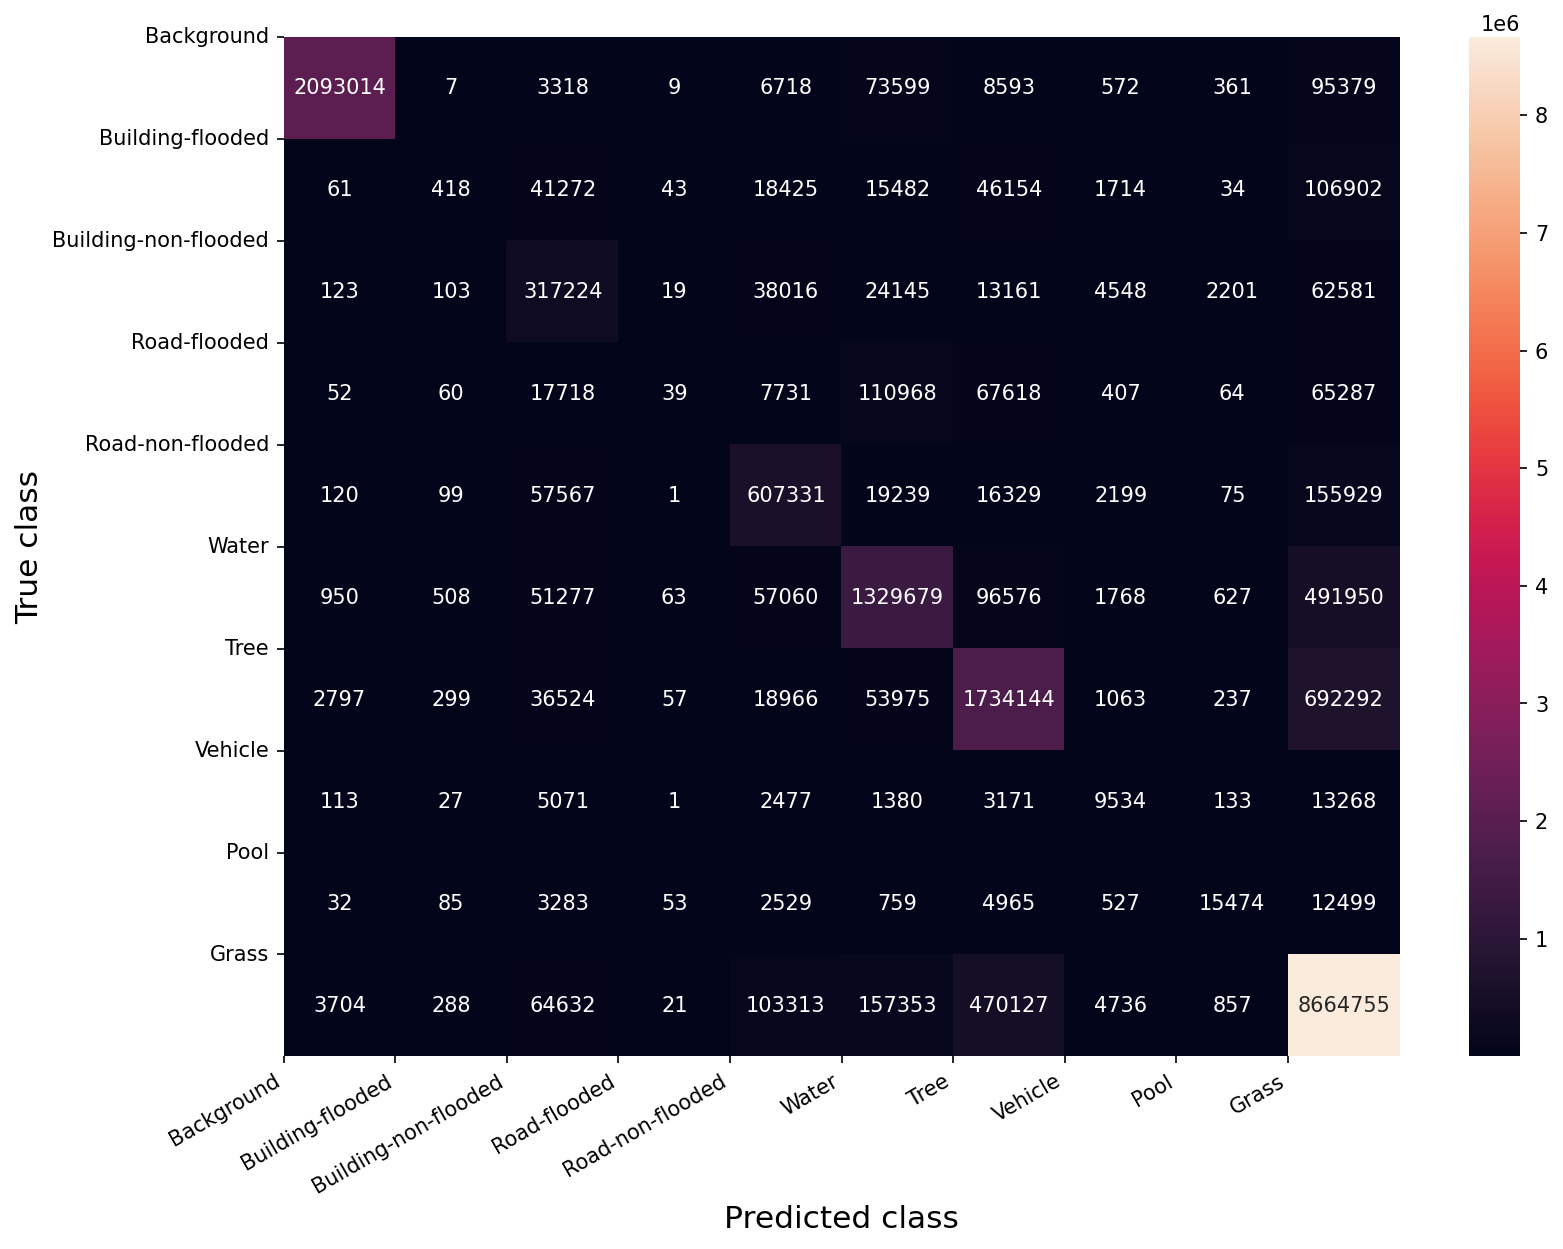

In [ ]:
# train data

import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

nb_classes = 10

plt.figure(dpi=150, figsize=(12,9))

label_names = ['Background','Building-flooded','Building-non-flooded','Road-flooded','Road-non-flooded','Water','Tree','Vehicle','Pool','Grass']
class_names = [0,1,2,3,4,5,6,7,8,9]
df_cm = pd.DataFrame(confusion_train, index=class_names, columns=class_names).astype(int)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
plt.ylabel('True class', fontsize = 15)
plt.xlabel('Predicted class', fontsize = 15)
plt.xticks(np.arange(len(label_names)), label_names, fontsize = 10, rotation=30)
plt.yticks(np.arange(len(label_names)), label_names, fontsize = 10)


([<matplotlib.axis.YTick at 0x7f2115f2e550>,
 [Text(0, 0.5, 'Background'),
  Text(0, 1.5, 'Building-flooded'),
  Text(0, 2.5, 'Building-non-flooded'),
  Text(0, 3.5, 'Road-flooded'),
  Text(0, 4.5, 'Road-non-flooded'),
  Text(0, 5.5, 'Water'),
  Text(0, 6.5, 'Tree'),
  Text(0, 7.5, 'Vehicle'),
  Text(0, 8.5, 'Pool'),
  Text(0, 9.5, 'Grass')])

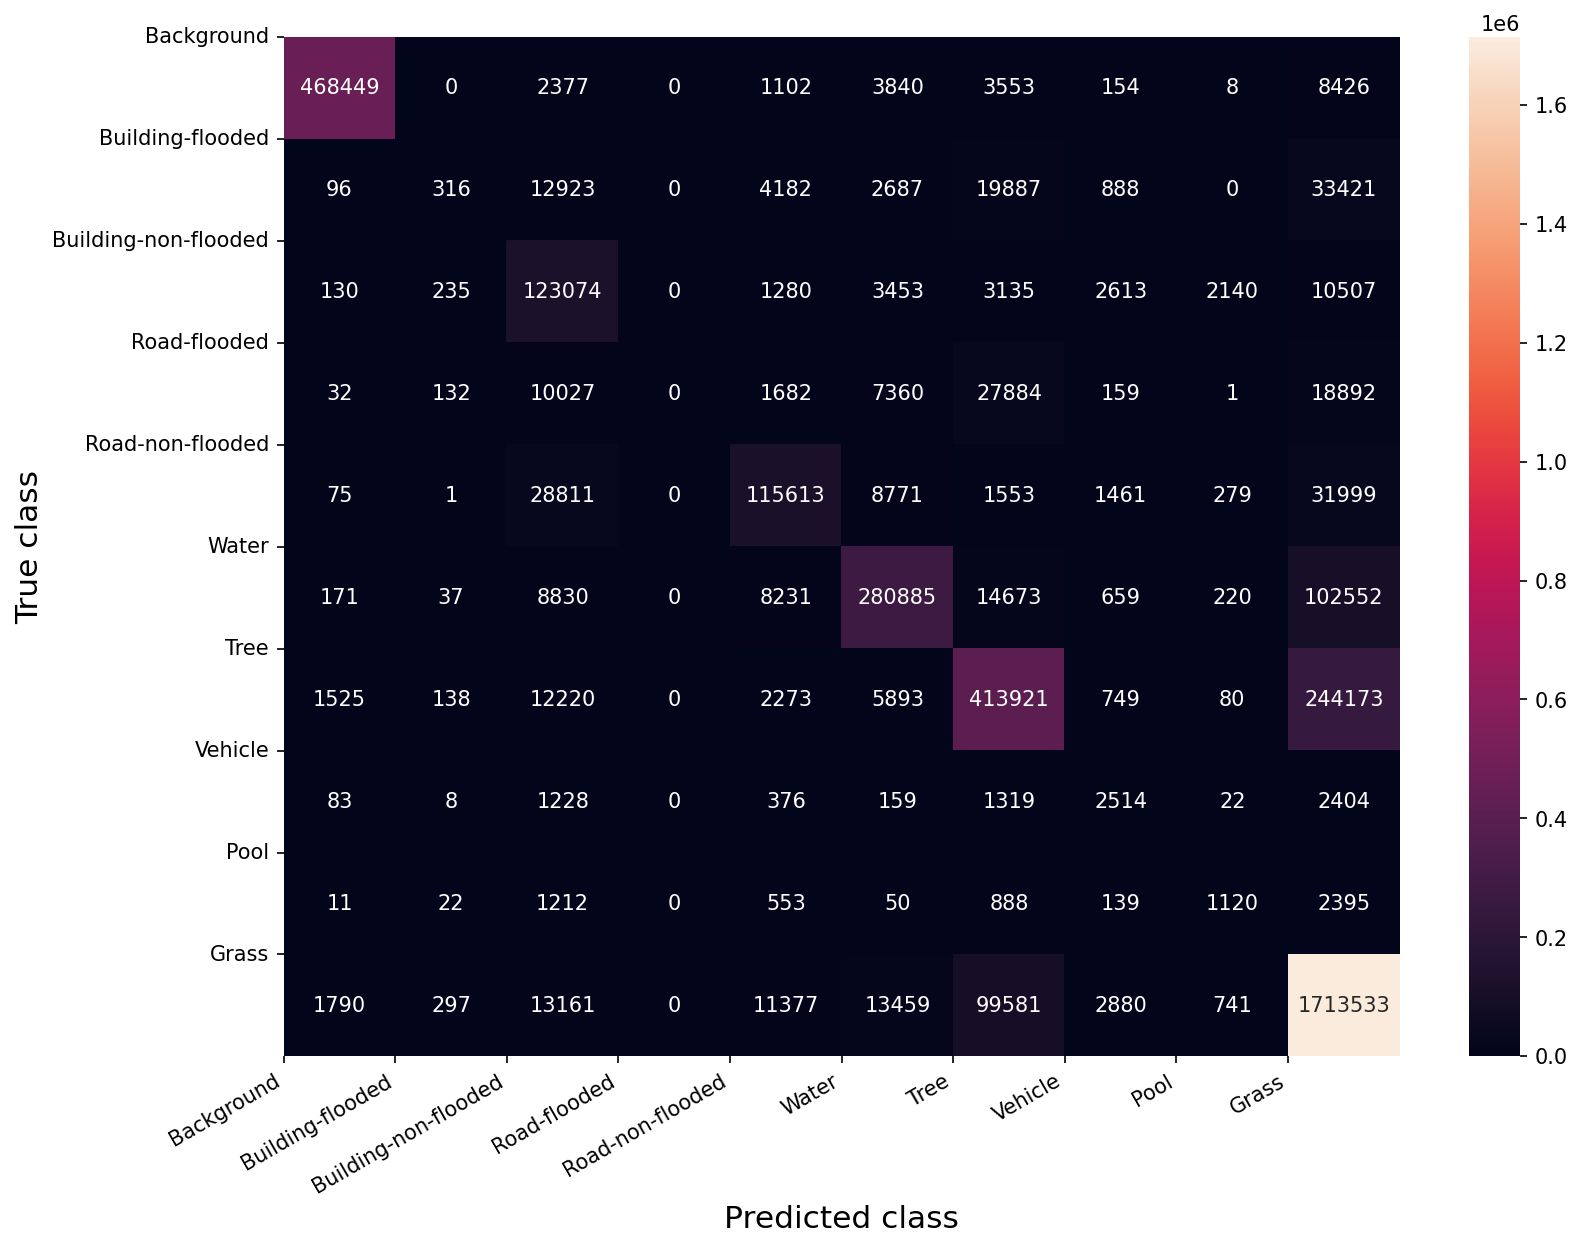

In [ ]:
# valid data

import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

nb_classes = 10

plt.figure(dpi=150, figsize=(12,9))

label_names = ['Background','Building-flooded','Building-non-flooded','Road-flooded','Road-non-flooded','Water','Tree','Vehicle','Pool','Grass']
class_names = [0,1,2,3,4,5,6,7,8,9]
df_cm = pd.DataFrame(confusion_val, index=class_names, columns=class_names).astype(int)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
plt.ylabel('True class', fontsize = 15)
plt.xlabel('Predicted class', fontsize = 15)
plt.xticks(np.arange(len(label_names)), label_names, fontsize = 10, rotation=30)
plt.yticks(np.arange(len(label_names)), label_names, fontsize = 10)

### Accuracy of each class

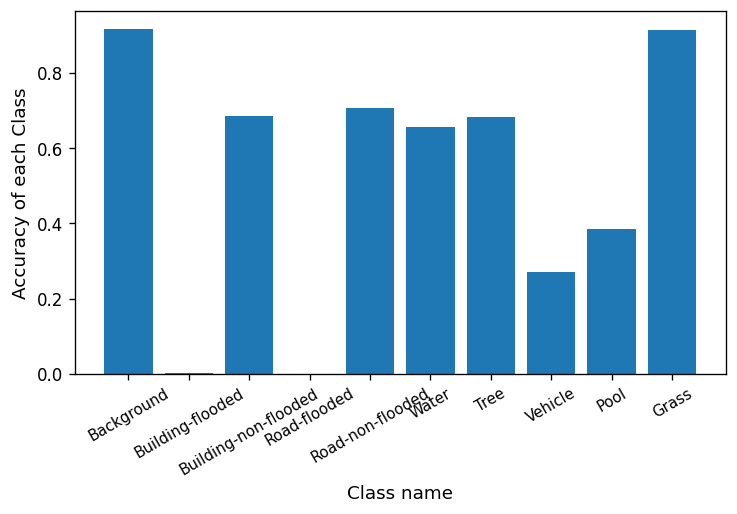

In [ ]:
# train data

import matplotlib.pyplot as plt
import numpy as np

train_diag = []
for i in range(10):
    diag = confusion_train[i][i]
    train_diag.append(diag)
label_ac=train_diag/confusion_train.sum(1)

plt.figure(dpi=120, figsize=(7,4))
plt.bar(range(len(label_ac)), label_ac)
plt.ylabel('Accuracy of each Class', fontsize = 11)
plt.xlabel('Class name', fontsize = 11)
plt.xticks(np.arange(len(label_names)), label_names, fontsize = 9, rotation=30)
plt.show()

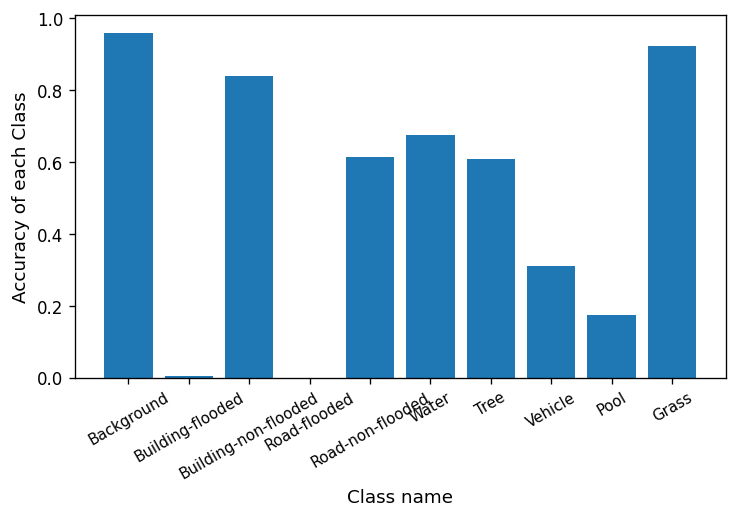

In [ ]:
# valid data

import matplotlib.pyplot as plt
import numpy as np

val_diag = []
for i in range(10):
    diag = confusion_val[i][i]
    val_diag.append(diag)
label_ac=val_diag/confusion_val.sum(1)

plt.figure(dpi=120, figsize=(7,4))
plt.bar(range(len(label_ac)), label_ac)
plt.ylabel('Accuracy of each Class', fontsize = 11)
plt.xlabel('Class name', fontsize = 11)
plt.xticks(np.arange(len(label_names)), label_names, fontsize = 9, rotation=30)
plt.show()

### Visualization
* To display examples of the predicted results, need to update the model first, then load test data

#### load test data

https://drive.google.com/drive/folders/14e1_OV9KcMLflWiv0PHsUNF8t3gtitus?usp=share_link

In [ ]:
# Download the "test" folder from the above link

# paths for data upload
import os
PATH = os.getcwd() # check dir
TEST_FEATURES_PATH = PATH + '/test/image'   # the file path may need to be modified 
TEST_LABELS_PATH = PATH + '/test/mask'

## if run in Colab
# TEST_FEATURES_PATH = '/content/drive/MyDrive/IPEO_project_data/test/image'
# TEST_LABELS_PATH = '/content/drive/MyDrive/IPEO_project_data/test/mask'

#### load and update model

In [ ]:
# U-Net
import torch.nn as nn

class DummyConv(nn.Module):
    """(convolution => sigmoid)"""

    def __init__(self, in_channels, out_channels):            
        super().__init__()
            
        self.single_conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.Sigmoid(inplace=True)
        )

    def forward(self, x):
        return self.single_conv(x)

    

class DummyNetwork(nn.Module):

    def __init__(self, n_channels):
        super(DummyNetwork, self).__init__()
        self.initial_layer = DummyConv(n_channels, 64)
        self.second_layer = DummyConv(64, 128)
        self.third_layer = DummyConv(128, 256)

    def forward(self, x):
        x1 = self.initial_layer(x)
        x2 = self.second_layer(x1)
        x3 = self.third_layer(x2)
        return x3


class DoubleConv(nn.Module):
    """(convolution => batch normalization => ReLU => convolution => batch normalization => ReLU)
    Batch normalization is a technique for normalization over mini-batches. 
    """
    
    def __init__(self, in_channels, out_channels, mid_channels=None):
        super().__init__()

        self.double_conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels), #torch.nn.BatchNorm2d(num_features=C if input : N,C,H,W)
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        return self.double_conv(x)


class UNet(nn.Module):
    def __init__(self, n_channels, n_classes):
        super(UNet, self).__init__()
        self.n_channels = n_channels
        self.n_classes = n_classes

        self.dc1 = DoubleConv(n_channels, 64)
        self.mp1 = nn.MaxPool2d(2)
        self.dc2 = DoubleConv(64, 128)
        self.mp2 = nn.MaxPool2d(2)
        self.dc3 = DoubleConv(128, 256)
        self.mp3 = nn.MaxPool2d(2)
        self.dc4 = DoubleConv(256, 512)
        self.mp4 = nn.MaxPool2d(2)
        self.dc5 = DoubleConv(512, 1024)

        self.up1 = nn.ConvTranspose2d(1024, 512, kernel_size=2, stride=2) #up conv
        self.dc6 = DoubleConv(1024, 512)
        self.up2 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2) #up conv
        self.dc7 = DoubleConv(512, 256)
        self.up3 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2) #up conv
        self.dc8 = DoubleConv(256, 128)        
        self.up4 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2) #up conv
        self.dc9 = DoubleConv(128, 64)
        self.outc = nn.Conv2d(64, n_classes, kernel_size=1)


    def forward(self, x):
        
        x1 = self.dc1(x)
        x2 = self.mp1(x1)
        x2 = self.dc2(x2)       
        x3 = self.mp2(x2)
        x3 = self.dc3(x3)
        x4 = self.mp3(x3)
        x4 = self.dc4(x4)
        x5 = self.mp4(x4)
        x5 = self.dc5(x5)        

        x = self.up1(x5)
        x = torch.cat([x4, x], dim=1)
        x = self.dc6(x)
        x = self.up2(x)
        x = torch.cat([x3, x], dim=1)
        x = self.dc7(x)
        x = self.up3(x)
        x = torch.cat([x2, x], dim=1)
        x = self.dc8(x)
        x = self.up4(x)
        x = torch.cat([x1, x], dim=1)
        x = self.dc9(x)
        logits = self.outc(x)
        return logits

In [ ]:
# Create model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = UNet(n_channels=3, n_classes=10)
model = model.to(device)

# Update model
model.load_state_dict(checkpoint['model_state_dict'])

<All keys matched successfully>

#### load test dataset

In [ ]:
#Load test data
from torchvision.io import read_image
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, datasets, models

class CustomImageDatasetTEST(Dataset):
    def __init__(self, label_dir, img_dir,transform):
        self.img_labels = label_dir
        self.img_dir = img_dir
        self.transform = transform
        self.len = len(os.listdir(self.img_labels))
        self.img_sort = sorted(os.listdir(self.img_dir))
        self.label_sort = sorted(os.listdir(self.img_labels))

    def __len__(self):
        return self.len

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_sort[idx])
        image = read_image(img_path).float()
        label_path = os.path.join(self.img_labels, self.label_sort[idx])
        label = read_image(label_path).float()
        image, label = self.augmentation(image, label)
        if self.transform:
            image = self.transform(image)
        return image, label

    def augmentation(self, image, label):
        # Resize
        resize = transforms.Resize((256, 256))
        image = resize(image)
        label = resize(label)
        return image, label

In [ ]:
mean = torch.tensor([106.4888, 116.0904,  87.6063])
std = torch.tensor([39.8035, 36.5686, 41.5882])

transforms_val = transforms.Compose([
    # transforms.ToTensor(),
    transforms.Normalize(mean, std)
    ])

In [ ]:
test_set = CustomImageDatasetTEST(TEST_LABELS_PATH, TEST_FEATURES_PATH, transforms_val)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=1, shuffle=False)    

#### get prediction results

In [ ]:
# get true and prected masks
y_trues = []
y_preds = []

#for i in range(len(test_loader)):
for batch_idx, (inputs, labels) in enumerate(test_loader):
    inputs = inputs.to(device)#.float()
    labels = labels.to(device)#.float()
  
    # Predict
    outputs = model(inputs)
    pred = torch.sigmoid(outputs)
    pred = pred.data.cpu().numpy()
    y_preds.append(pred)
    y_trues.append(labels)

In [ ]:
import cv2
def reverse_transform_mask(inp):
    inp=inp.transpose((1, 2, 0))
    t_mask=np.argmax(inp,axis=2).astype('float32') 
    t_mask=cv2.resize(t_mask, dsize=(4000, 3000))
    kernel = np.ones((3,3),np.uint8)
    t_mask = cv2.erode(t_mask, kernel, iterations=1)
    return t_mask


# transform predicted masks
mask_preds = []
for i in range(len(y_preds)):
    a = y_preds[i][0]
    a = reverse_transform_mask(a)
    mask_preds.append(a)


# tranform true masks
mask_trues = []
for i in range(len(y_trues)):
    b = y_trues[i].cpu().numpy().squeeze()
    b = cv2.resize(b, dsize=(4000, 3000))
    mask_trues.append(b)


# transform true images
import cv2
x_trues = []
std_inv = 1 / (std + 1e-7)
unnormalize = transforms.Normalize(-mean * std_inv, std_inv)

for batch_idx, (inputs, labels) in enumerate(test_loader):
  inputs = inputs[0].squeeze()
  inputs = unnormalize(inputs).permute((1, 2, 0)).numpy().astype(np.uint8)
  inputs = cv2.resize(inputs, dsize=(4000, 3000))
  x_trues.append(inputs)

#### display images and masks

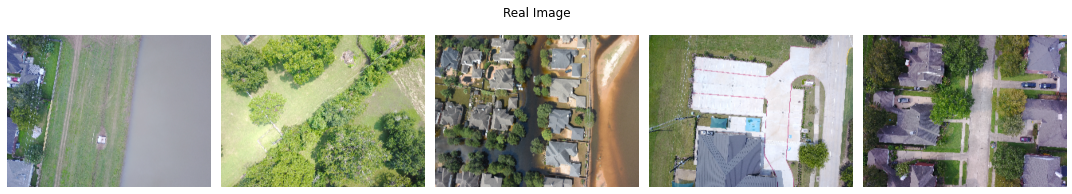

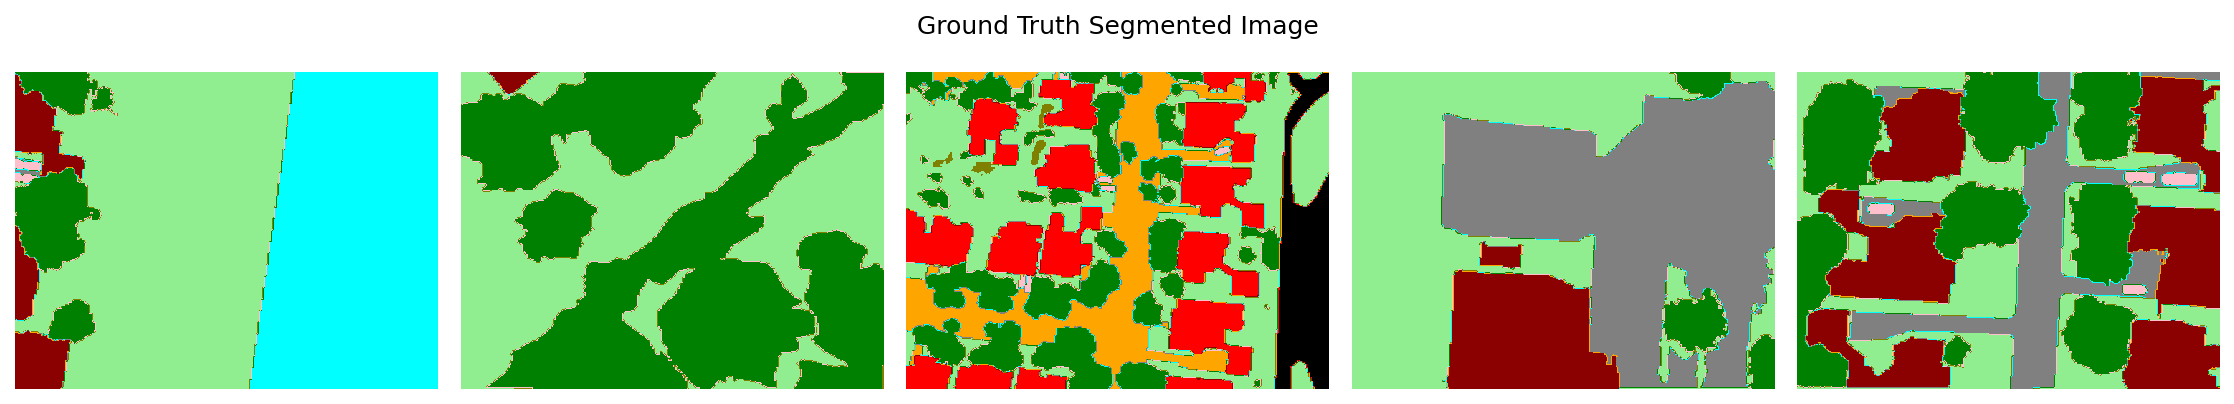

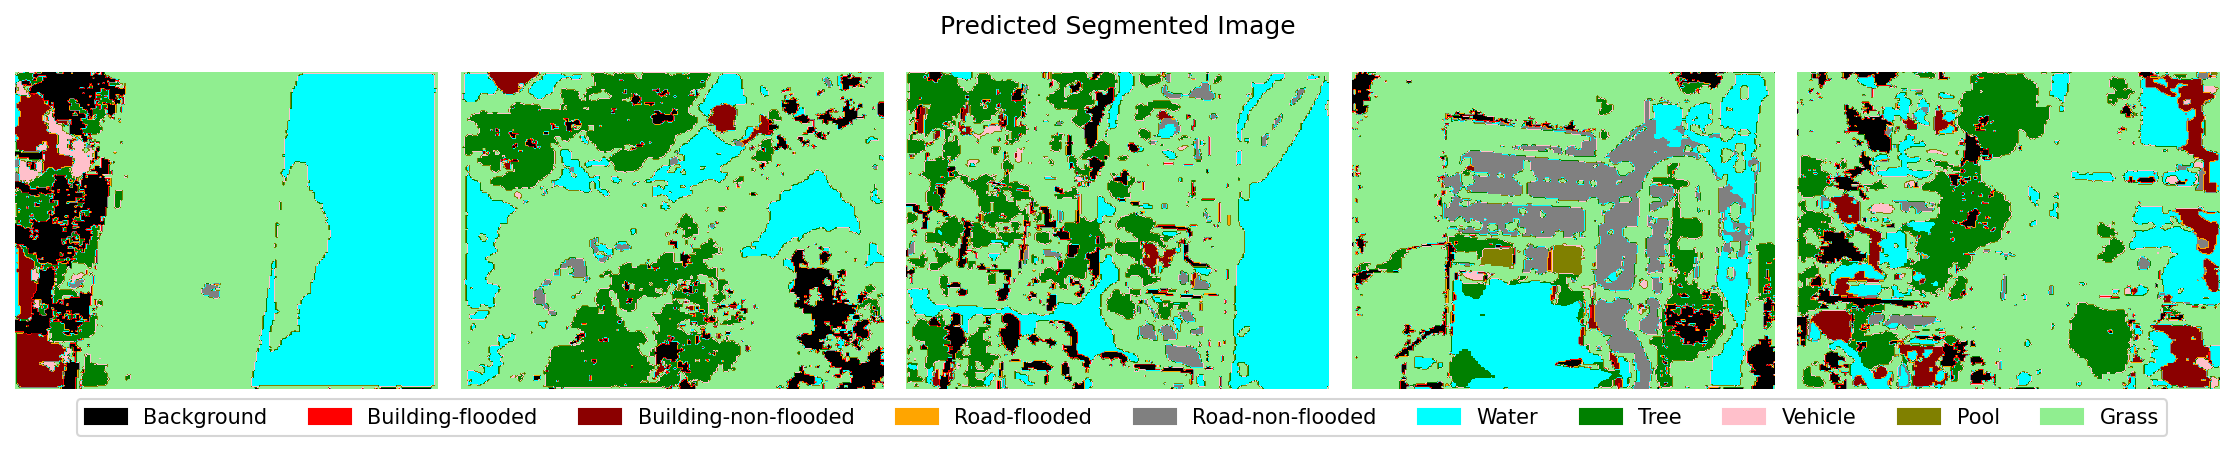

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches

label_names = ['Background','Building-flooded','Building-non-flooded','Road-flooded','Road-non-flooded','Water','Tree','Vehicle','Pool','Grass']
color = ['black', 'red', 'darkred', 'orange', 'grey', 'cyan', 'green', 'pink', 'olive', 'lightgreen']
patches = [mpatches.Patch(color=color[i], label="{:s}".format(label_names[i])) for i in range(len(color))]
cmap = ListedColormap(color)
norm = BoundaryNorm([-1,0.1,1.1,2.1,3.1,4.1,5.1,6.1,7.1,8.1,9.1], cmap.N)

nums = [5, 17, 25, 28, 57]
fig, axs = plt.subplots(1,5, figsize=(5*3, 3))
for i in range(5):
    axs[i].imshow(x_trues[nums[i]]) 
    axs[i].axis("off")   
fig.suptitle("Real Image")
plt.tight_layout()

# display ground truth segmented images
fig, axs = plt.subplots(1,5, figsize=(5*3, 3), dpi=150)
for i in range(5):
    axs[i].imshow(mask_trues[nums[i]], cmap=cmap, interpolation='none', norm=norm) 
    axs[i].axis("off")   
fig.suptitle("Ground Truth Segmented Image")
plt.tight_layout()


# display predicted segmented images
fig, axs = plt.subplots(1,5, figsize=(5*3, 3), dpi=150)
for i in range(5):
    axs[i].imshow(mask_preds[nums[i]], cmap=cmap, interpolation='none', norm=norm) 
    axs[i].axis("off")   
fig.suptitle("Predicted Segmented Image")
plt.tight_layout()

ax = plt.gca()
ax.legend(handles=patches, bbox_to_anchor=(0.9, 0), ncol=10)   # add legend